In [68]:
import numpy as np
import pandas as pd
import os
from os import listdir
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from math import log,sqrt
from sklearn.preprocessing import FunctionTransformer

In [70]:
income_gdp_percapita = "/home/quazar07/Desktop/InfoViz/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv"
life_expectancy = "/home/quazar07/Desktop/InfoViz/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv"
child_mortality = "/home/quazar07/Desktop/InfoViz/ddf--gapminder--systema_globalis-master/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv"

In [71]:
income_data = pd.read_csv(income_gdp_percapita)
life_expectancy_data = pd.read_csv(life_expectancy)
child_mortality_data = pd.read_csv(child_mortality)

In [73]:
grouped_income_data = income_data.groupby(['time'])['income_per_person_gdppercapita_ppp_inflation_adjusted'].mean().to_frame().reset_index(level=['time'])
grouped_life_expectancy_data = life_expectancy_data.groupby(['time'])['life_expectancy_years'].mean().to_frame().reset_index(level=['time'])
grouped_child_mortality_data = child_mortality_data.groupby(['time'])['child_mortality_0_5_year_olds_dying_per_1000_born'].mean().to_frame().reset_index(level=['time'])

In [74]:
filtered_income_data = grouped_income_data[(grouped_income_data['time']>1900) & (grouped_income_data['time']<2019)]
filtered_life_expectancy_data = grouped_life_expectancy_data[(grouped_life_expectancy_data['time']>1900)&(grouped_life_expectancy_data['time']<2019)]
filtered_child_mortality_data = grouped_child_mortality_data[(grouped_child_mortality_data['time']>1900)&(grouped_child_mortality_data['time']<2019)]

In [50]:
# PROBLEM 3

X = filtered_income_data.iloc[:,1].values.reshape(-1,1)
Y = filtered_life_expectancy_data.iloc[:,1].values.reshape(-1,1)

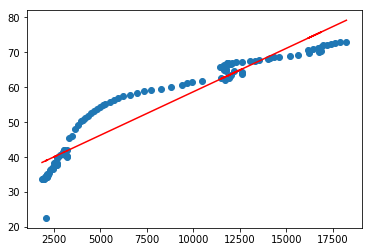

In [53]:
#Trying a linear model, with linear regression

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

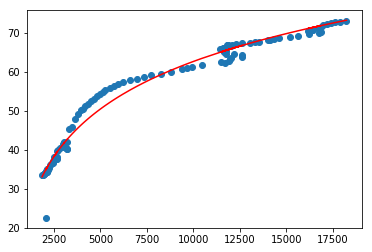

In [69]:
#Trying a logarithmic transformed model, with linear regression
linear_regressor = LinearRegression()
transformer = FunctionTransformer(np.log1p, validate=True)
linear_regressor.fit(transformer.transform(X), Y)  
Y_pred = linear_regressor.predict(transformer.transform(X))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [77]:


X = filtered_income_data.iloc[:,1].values.reshape(-1,1)
Y = filtered_child_mortality_data.iloc[:,1].values.reshape(-1,1)

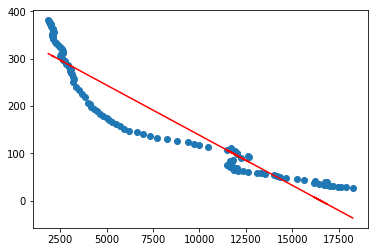

In [78]:

#Trying a linear model, with linear regression

linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

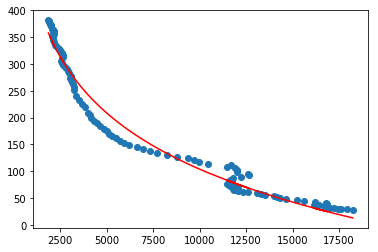

In [79]:
#Trying a logarithmic transformed model, with linear regression
linear_regressor = LinearRegression()
transformer = FunctionTransformer(np.log1p, validate=True)
linear_regressor.fit(transformer.transform(X), Y)  
Y_pred = linear_regressor.predict(transformer.transform(X))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

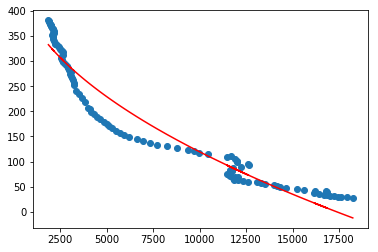

In [84]:
#Trying a quadratic transformed model, with linear regression
linear_regressor = LinearRegression()
transformer = FunctionTransformer(np.sqrt, validate=True)
linear_regressor.fit(transformer.transform(X), Y)  
Y_pred = linear_regressor.predict(transformer.transform(X))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()